# Description: This program attempts to predicts the future price of a stock


In [1]:
#import the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# collect and clean the data 

In [62]:
df = pd.read_csv('ADANIPORTS.csv')
df = df.dropna()

In [63]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
866,2011-06-01,MUNDRAPORT,EQ,161.45,162.10,165.70,161.25,163.50,164.00,164.08,2574106,4.223703e+13,19171.0,1271255,0.4939
867,2011-06-02,MUNDRAPORT,EQ,164.00,164.00,165.15,160.15,161.15,161.25,162.17,1699298,2.755678e+13,16176.0,791462,0.4658
868,2011-06-03,MUNDRAPORT,EQ,161.25,161.50,162.80,159.20,161.00,161.05,161.02,1185817,1.909361e+13,14810.0,722154,0.6090
869,2011-06-06,MUNDRAPORT,EQ,161.05,160.50,161.10,159.05,160.00,159.85,160.09,546378,8.746905e+12,7071.0,386144,0.7067
870,2011-06-07,MUNDRAPORT,EQ,159.85,159.85,162.75,156.35,157.00,157.25,158.52,2193466,3.477027e+13,17865.0,1425849,0.6500


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '2019-04-24'),
  Text(0.0, 0, '2011-06-01'),
  Text(500.0, 0, '2013-05-31'),
  Text(1000.0, 0, '2015-06-12'),
  Text(1500.0, 0, '2017-06-20'),
  Text(2000.0, 0, '2019-06-28'),
  Text(2500.0, 0, ''),
  Text(3000.0, 0, '')])

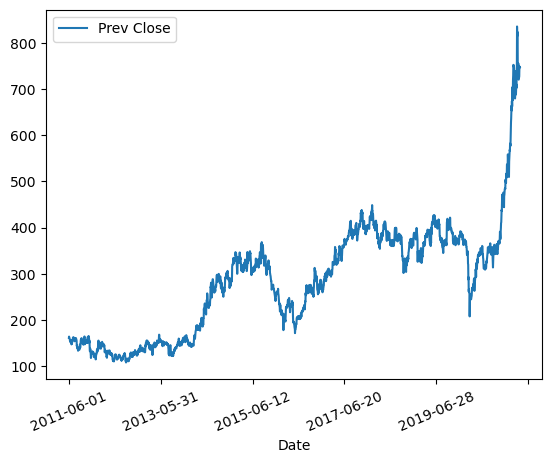

In [64]:
df.plot(x="Date", y="Prev Close")
plt.xticks(rotation=23)

# Create the model

In [65]:
model = RandomForestRegressor()

# Train The Model

In [66]:
x = df[['Open','High', 'Low', 'Volume']]
x = x[:int(len(df)-1)]
y = df['Prev Close']
y = y[:int(len(df)-1)]
model.fit(x,y) 

RandomForestRegressor()

# Test the model 

In [67]:
predictions = model.predict(x)
print('The model score is:', model.score(x,y))

The model score is: 0.9998705966274675


# Make the predictions

In [68]:
new_data = df[['Open','High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:', prediction)
print('Actual value is:' , df[['Prev Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [733.6535]
Actual value is: 746.75


# ARIMA and SEASONAL ARIMA
## Autoregressive Integrated Moving Averages
#### The general process for ARIMA models is the following:
##### .Visualize the time series data
##### .Make the time series data stationary
##### .Plot the correlation and autocorrelation charts
##### .construct the ARIMA model or sesonal ARIMA based on the data
##### .Use the model to make predictions


In [69]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [70]:
test_result=adfuller(df['Prev Close'])

# Differencing

In [71]:
df['Prev Close First Difference'] = df['Prev Close'].shift(1)

In [72]:
df['Prev Close'].shift(1)

866        NaN
867     161.45
868     164.00
869     161.25
870     161.05
         ...  
3317    737.80
3318    725.35
3319    730.75
3320    749.15
3321    746.25
Name: Prev Close, Length: 2456, dtype: float64

In [73]:
df['Seasonal First Difference']=df['Prev Close']-df['Prev Close'].shift(12)

In [74]:
df.head(15)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Prev Close First Difference,Seasonal First Difference
866,2011-06-01,MUNDRAPORT,EQ,161.45,162.10,165.70,161.25,163.50,164.00,164.08,2574106,4.223703e+13,19171.0,1271255,0.4939,NaN,NaN
867,2011-06-02,MUNDRAPORT,EQ,164.00,164.00,165.15,160.15,161.15,161.25,162.17,1699298,2.755678e+13,16176.0,791462,0.4658,161.45,NaN
868,2011-06-03,MUNDRAPORT,EQ,161.25,161.50,162.80,159.20,161.00,161.05,161.02,1185817,1.909361e+13,14810.0,722154,0.6090,164.00,NaN
869,2011-06-06,MUNDRAPORT,EQ,161.05,160.50,161.10,159.05,160.00,159.85,160.09,546378,8.746905e+12,7071.0,386144,0.7067,161.25,NaN
870,2011-06-07,MUNDRAPORT,EQ,159.85,159.85,162.75,156.35,157.00,157.25,158.52,2193466,3.477027e+13,17865.0,1425849,0.6500,161.05,NaN
871,2011-06-08,MUNDRAPORT,EQ,157.25,157.40,158.70,153.30,155.65,154.90,155.48,1431303,2.225382e+13,15027.0,931903,0.6511,159.85,NaN
872,2011-06-09,MUNDRAPORT,EQ,154.90,155.05,157.40,153.15,154.80,154.95,155.01,867109,1.344096e+13,6077.0,495942,0.5719,157.25,NaN
873,2011-06-10,MUNDRAPORT,EQ,154.95,155.40,155.40,150.30,151.95,152.00,152.42,838559,1.278096e+13,9369.0,513802,0.6127,154.90,NaN
874,2011-06-13,MUNDRAPORT,EQ,152.00,152.45,155.40,150.05,155.05,154.75,152.87,749987,1.146491e+13,8790.0,330159,0.4402,154.95,NaN
875,2011-06-14,MUNDRAPORT,EQ,154.75,154.95,157.75,154.35,157.05,156.55,155.96,599387,9.348061e+12,7620.0,290386,0.4845,152.00,NaN


In [75]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(prev_close):
    result = adfuller(prev_close)
    labels = ['ADF test statistic', 'P-value', '# Lags used', 'Number of observations used']
    
    for value, label in zip(result, labels):
        print(f"{label}: {value}")
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary.")


In [76]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF test statistic: -6.905947171953829
P-value: 1.2472051167014718e-09
# Lags used: 25
Number of observations used: 2418
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.


<Axes: >

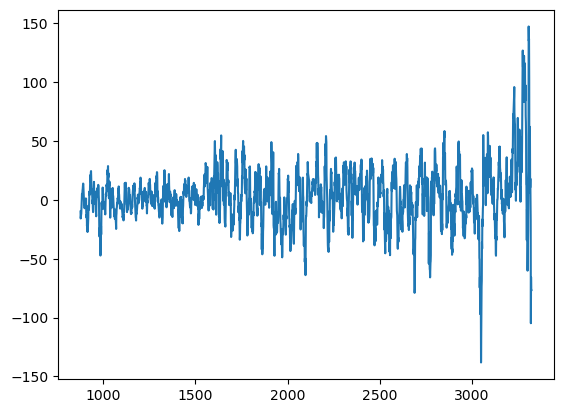

In [77]:
df['Seasonal First Difference'].plot()

# Final Thoughts on Autocorrelations and partial Autocorrelations 
##### .identification of an AR model is often best done with the PACF.
#####   .For an Ar model, the theortical PACF"shuts off" past the order of the model. The phrase"shuts off" means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the "order of the model"we mean the most extreme lag of X that is used as a predictor.
##### .identification of an MA model is often besr done with the ACF rather than the PACF.
#####   .For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF.The ACF will have non-zero autocorrelations onlt at lags involved in the model.

In [87]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [89]:
import statsmodels.api as sm

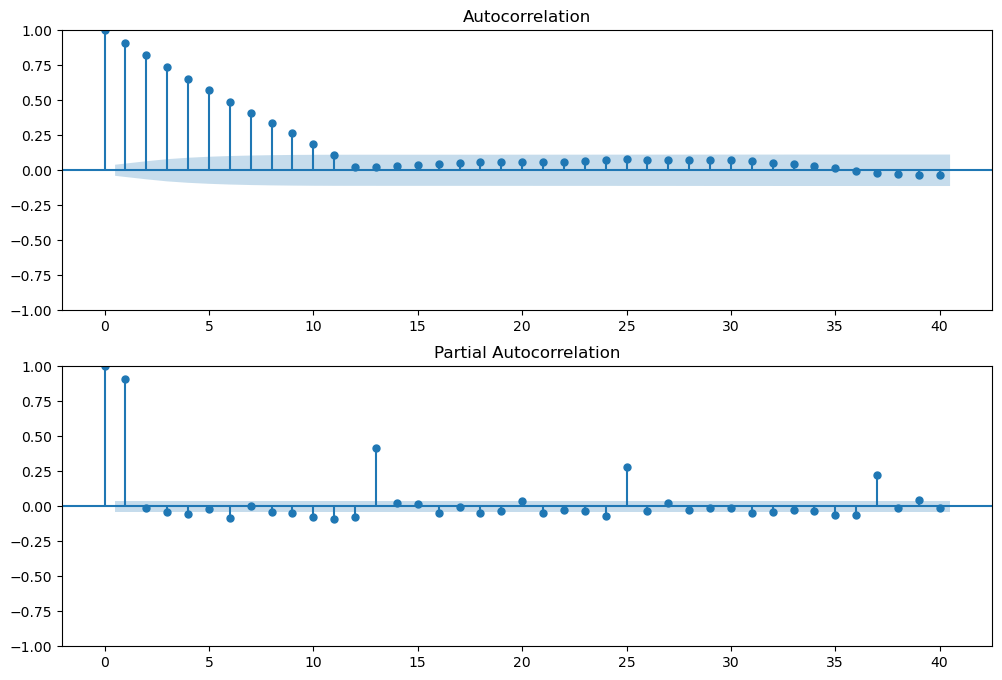

In [90]:
fig = plt.figure(figsize=(12,8))
axl = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=axl)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [92]:
model=sm.tsa.statespace.SARIMAX(df['High'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

D:\ANANYA\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ANANYA\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: >

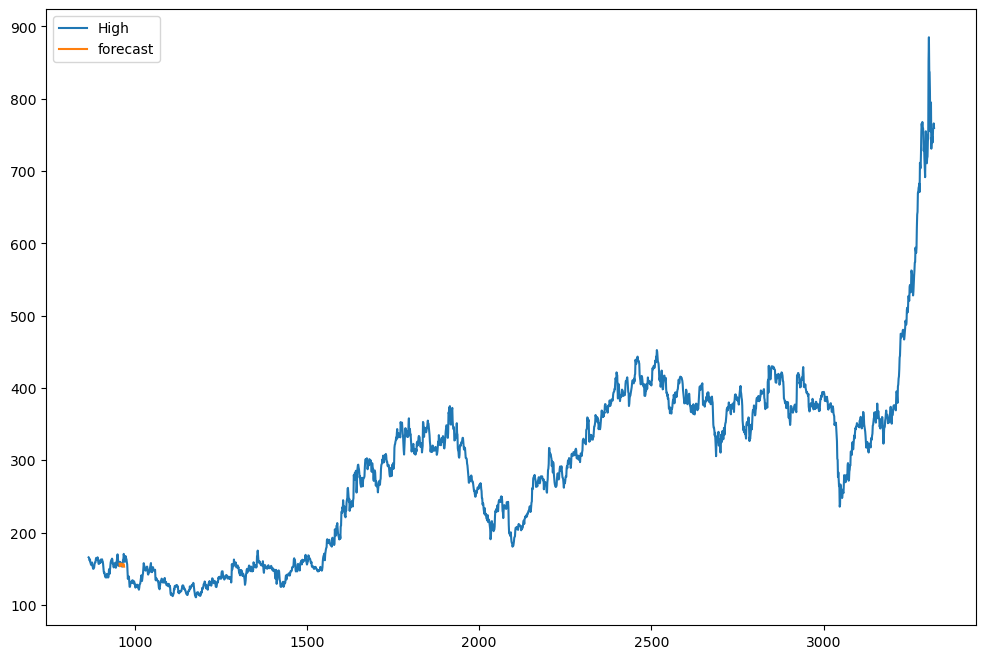

In [96]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['High', 'forecast']].plot(figsize=(12,8))